In [1]:
from ipynb.fs.full.Models import *
saveFIG = True

In [2]:
fname = 'init_params.csv'
df = pd.read_csv(fname, sep=',')
df.index = df.Model
a_ws = np.array(df.loc[times[0]].a)
r_ws = np.array(df.loc[times[0]].r)
weights = [(float(a_ws[i]),float(r_ws[i])) for i in range(len(a_ws))]

In [3]:
fname='params/SEIAR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df=df.drop(columns='country')
df

,AIC,cost,time,a,r,beta,gamma,p,mu_I,mu_A,I0,alpha,t_lock,beta_lock
3,-2508.165965,0.000356,rational,1.0,1.0,9.957948,38.550057,0.000681,4.449112e-02,9.549221,7.555107e-12,0.006327,NaN,NaN
4,-2507.976371,0.000563,rational,0.0,1.0,16.376264,9.419385,0.000563,4.488672e-02,15.492305,5.718434e-12,0.007428,NaN,NaN
5,-2505.758883,0.000380,exp,1.0,1.0,4.754340,8.393677,0.003241,5.088782e-02,3.755497,5.706579e-12,0.006950,NaN,NaN
7,-2486.838396,0.000408,fermi,1.0,1.0,1.963287,0.044980,0.427149,2.382995e-03,0.301274,1.363934e-08,0.160358,28.0,NaN
8,-2481.382269,0.000702,fermi,0.0,1.0,2.406124,0.045223,0.999999,5.233748e-02,0.081785,4.932399e-09,0.147936,23.0,NaN
9,-2450.264698,0.000603,rational,0.0,0.0,2.461270,5.934510,0.014670,4.873048e-02,2.005632,2.014388e-10,0.014814,NaN,NaN
10,-2424.829154,0.000699,fermi,0.0,0.0,2.707309,0.049042,0.992608,1.026930e-01,0.104868,6.294880e-09,0.122414,21.0,NaN
11,-2413.032884,0.000654,exp,0.0,0.0,4.729300,0.885955,0.015247,3.493268e-02,2.242264,8.640218e-11,0.020916,NaN,NaN
14,-2361.658519,0.001405,exp,0.0,1.0,1.414525,1.431270,1.000000,1.025915e-04,0.625184,1.632573e-10,0.061053,NaN,NaN
15,-2357.111814,0.001222,fermi,1.0,0.0,14.675551,0.051404,0.006941,1.676555e-01,0.184460,2.346757e-10,0.096027,0.0,NaN


In [4]:
#original data parameters
fname='original_params/SEIAR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df = df.drop(columns='country')
df = df.drop(columns='a')
df = df.drop(columns='r')
df

,AIC,cost,time,beta,gamma,p,mu_I,mu_A,I0,alpha,t_lock,beta_lock
0,-2507.534797,5.644967e-04,rational,7.179394,41.297674,1.282428e-03,0.044849,6.790353,1.223686e-11,0.007408,NaN,NaN
1,-2483.979171,6.597380e-04,fermi,1.330030,0.044974,1.538487e-02,0.137076,0.000003,3.802212e-08,0.170765,28.0,NaN
4,-2386.045319,1.033778e-09,exp,1.231791,1.280897,9.999895e-01,0.003116,0.376252,7.858348e-10,0.058434,NaN,NaN
19,-1717.772652,4.552663e-02,lock,166.163142,0.014473,1.072617e-10,23.888498,0.750317,2.477078e-14,NaN,22.0,0.059935


plot requires loaded models. Model(country, time)

In [5]:
# Load Models

models = []
for i,country in enumerate(countries):
    mods=[]
    for time in times:
        mod=Model(country, SEIAR, time=time, start=starts[i],download=False)
        #mod=country+' '+time #just test line
        mods.append(mod)
    mods=dict(zip(times,mods))
    models.append(mods)
models=dict(zip(countries,models))

Creating SEIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SEIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SEIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SEIAR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SEIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SEIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SEIAR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41


In [6]:
country = 'Italy'
i=c_index[country]

# 1. Fixed weights
Plot: v_a + beta + original data<br>
number of plots: times = 4

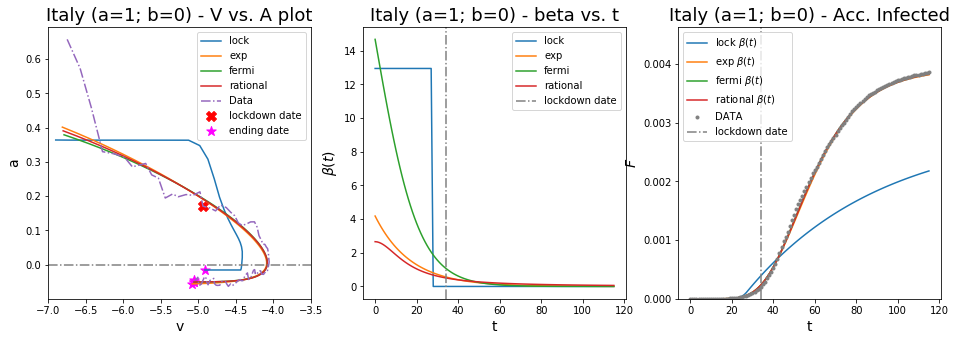

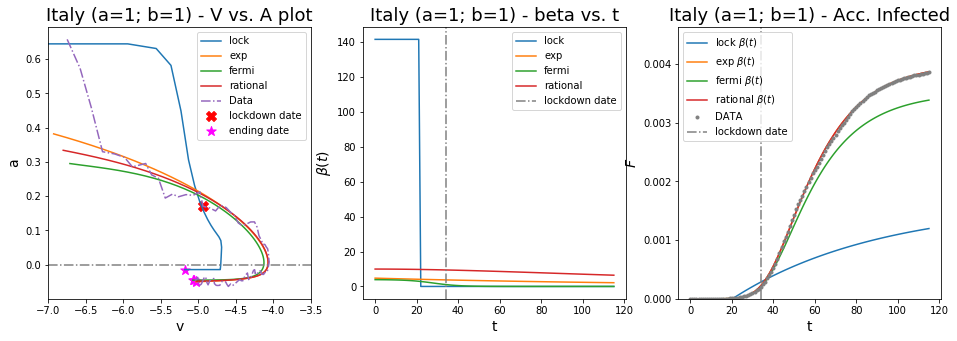

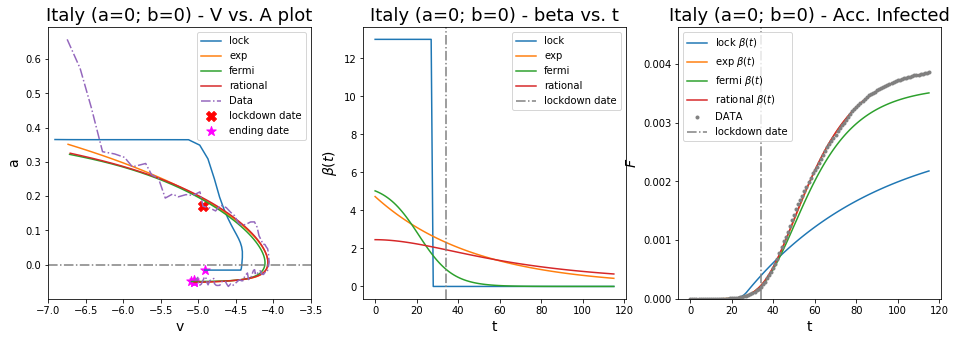

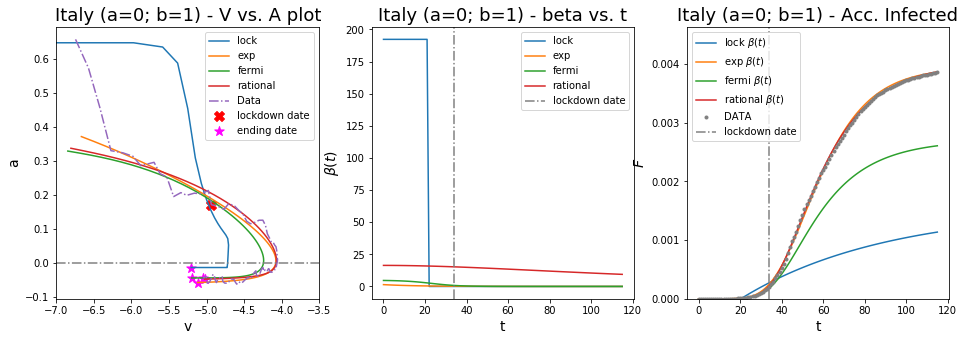

In [7]:
for a_w, r_w in weights:

    fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

    for time in times:
        #load models and params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        ##in-loop plots
        #va
        v, a = mod.predict(opt_params)
        ax.plot(v, a, label=time)
        ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

        #beta
        t = np.arange(0, mod.T)
        beta = mod.predict(opt_params, out='Beta')
        ax2.plot(t, beta, label=time)

        #time series
        F = mod.predict(opt_params,out='F')
        plt.plot(t, F, label = time + r' $\beta(t)$')

    ##after loop plots
    intitle = ' (a='+str(int(a_w))+'; b='+str(int(r_w))+')'
    #va
    ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
    ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                    c='red',marker='X',s=100, label='lockdown date')
    ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='magenta',marker='*',s=100,zorder=2, label='ending date')

    ax.set_xlim([-7., -3.5]) #not useful for fixed country
    ax.axhline(y=0, color='gray', linestyle='-.')
    ax.legend()
    ax.set_xlabel('v', size=14)
    ax.set_ylabel('a', size=14)
    ax.set_title(countries[i]+intitle+' - V vs. A plot', size=18)

    #beta
    ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax2.legend()
    ax2.set_xlabel('t', size=14)
    ax2.set_ylabel(r'$\beta(t)$', size=14)
    ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

    #time series
    ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
    ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
    ax3.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax3.legend()
    ax3.set_xlabel('t', size=14)
    ax3.set_ylabel(r'$F$', size=14)
    ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
    if saveFIG:
        fname = country +'_'+ str(int(a_w))+'_'+str(int(r_w)) +'.png'
        plt.savefig('FIGURES/'+fname)
    plt.show()

# 2. different weights, fixed time

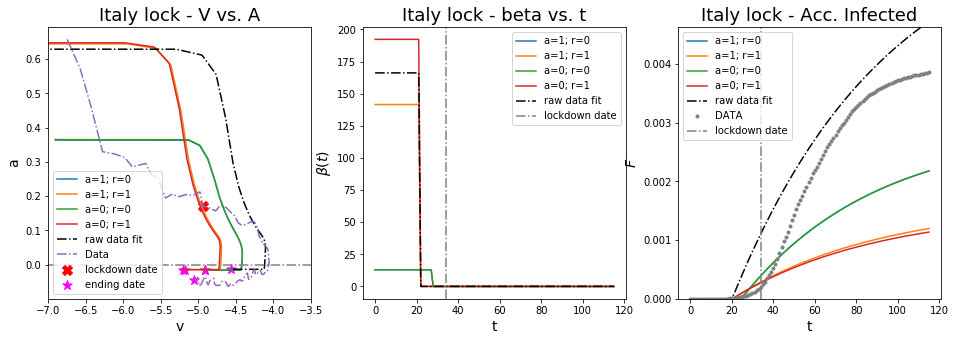

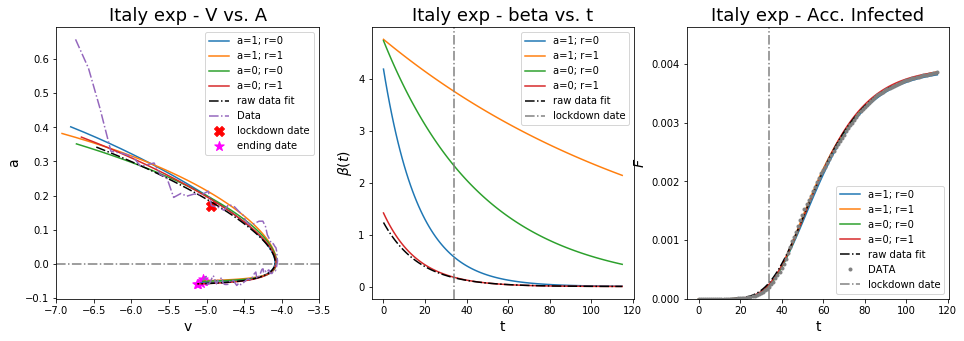

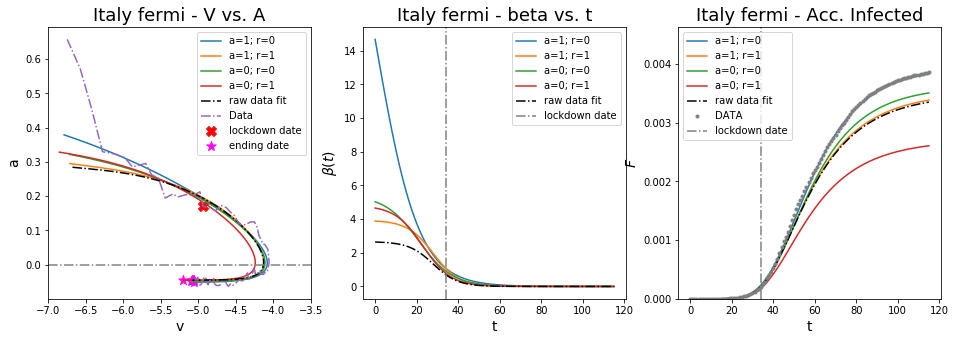

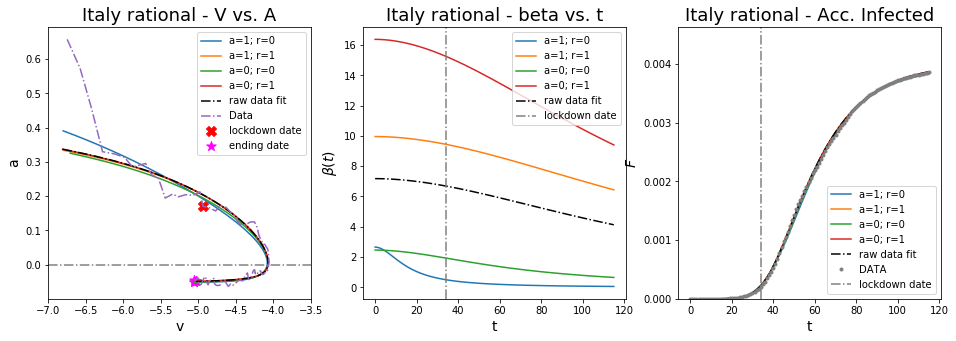

In [8]:
for time in times:
    fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

    # WEIGHTS FIT
    for a_w,r_w in weights:
        label='a=' +str(int(a_w))+'; r='+str(int(r_w))
        #load models and params
        mod=models[country][time]
        fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
        df = pd.read_csv('params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        ##in-loop plots
        #va
        v, a = mod.predict(opt_params)
        ax.plot(v, a, label=label)
        ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

        #beta
        t = np.arange(0, mod.T)
        beta = mod.predict(opt_params, out='Beta')
        ax2.plot(t, beta, label=label)

        #time series
        F = mod.predict(opt_params,out='F')
        plt.plot(t, F, label = label)
    
    try:
        # RAW DATA FIT
        mod=models[country][time]
        fname=time+'.csv'
        df = pd.read_csv('original_params/'+fname, index_col=0)
        opt_params=list(df.loc[country][:-2])

        ##in-loop plots
        label='raw data fit'
        #va
        v, a = mod.predict(opt_params)
        ax.plot(v, a, '-.', label=label, color='black')
        ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

        #beta
        t = np.arange(0, mod.T)
        beta = mod.predict(opt_params, out='Beta')
        ax2.plot(t, beta, '-.', label=label, color='black')

        #time series
        F = mod.predict(opt_params,out='F')
        plt.plot(t, F, '-.', label = label, color='black')
    except: 
        print('raw data plot not working yet')

    ##after loop plots
    intitle=' '+time
    #va
    ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
    ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                    c='red',marker='X',s=100, label='lockdown date')
    ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                    c='magenta',marker='*',s=100,zorder=2, label='ending date')

    ax.set_xlim([-7., -3.5]) #not useful for fixed country
    ax.axhline(y=0, color='gray', linestyle='-.')
    ax.legend()
    ax.set_xlabel('v', size=14)
    ax.set_ylabel('a', size=14)
    ax.set_title(countries[i]+intitle+' - V vs. A', size=18)

    #beta
    ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax2.legend()
    ax2.set_xlabel('t', size=14)
    ax2.set_ylabel(r'$\beta(t)$', size=14)
    ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

    #time series
    ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
    ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
    ax3.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
    ax3.legend()
    ax3.set_xlabel('t', size=14)
    ax3.set_ylabel(r'$F$', size=14)
    ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
    if saveFIG:
        fname = country +'_'+ time +'.png'
        plt.savefig('FIGURES/'+fname)
    plt.show()

# 3. AIC comparison

In [9]:
fname='params/SEIAR_models.csv'
df = pd.read_csv(fname, index_col=0)
df = df[df.country=='Italy']
df=df.drop(columns='country')

fname='original_params/SEIAR_models.csv'
df_raw = pd.read_csv(fname, index_col=0)
df_raw = df_raw[df_raw.country=='Italy']
df_raw = df_raw.drop(columns='country')
df_raw

,AIC,cost,time,a,r,beta,gamma,p,mu_I,mu_A,I0,alpha,t_lock,beta_lock
0,-2507.534797,5.644967e-04,rational,0.0,1.0,7.179394,41.297674,1.282428e-03,0.044849,6.790353,1.223686e-11,0.007408,NaN,NaN
1,-2483.979171,6.597380e-04,fermi,0.0,1.0,1.330030,0.044974,1.538487e-02,0.137076,0.000003,3.802212e-08,0.170765,28.0,NaN
4,-2386.045319,1.033778e-09,exp,0.0,1.0,1.231791,1.280897,9.999895e-01,0.003116,0.376252,7.858348e-10,0.058434,NaN,NaN
19,-1717.772652,4.552663e-02,lock,0.0,1.0,166.163142,0.014473,1.072617e-10,23.888498,0.750317,2.477078e-14,NaN,22.0,0.059935


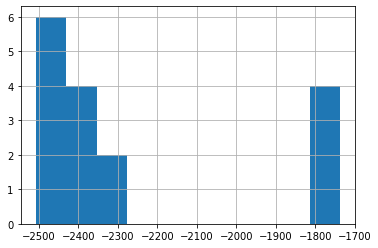

In [10]:
df.AIC.hist()
plt.show()

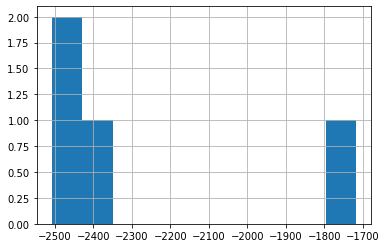

In [11]:
df_raw.AIC.hist()
plt.show()

In [12]:
#rearange df in weights order:
df = df.sort_values('a',axis=0, ascending=False)
df1 = df[df.a==1.].sort_values('r')
df1.index = range(len(df1))
df2 = df[df.a==0.].sort_values('r')
df2.index = range(len(df1),2*len(df1))
df = pd.concat([df1,df2])

#merge original and va results
df = pd.concat([df, df_raw])

df = df.drop(columns='a')
df = df.drop(columns='r')
df.index=range(len(df))

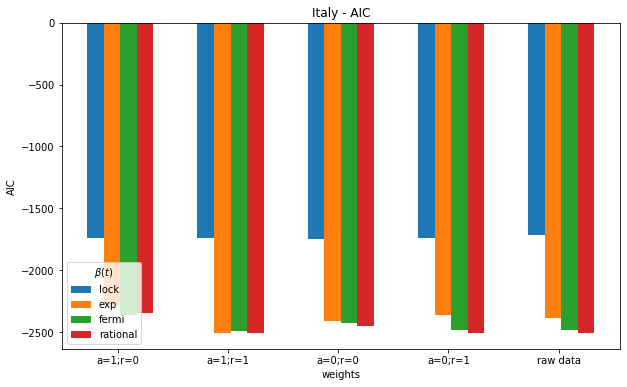

In [13]:
#barplot
plt.figure(figsize=(10,6))

width=0.15
x=np.array(np.arange(5)-3*width)
xprime = np.array(np.arange(4)-3*width) # as long as raw data fit doesn't work

data=[]
for i,time in enumerate(times):
    data=df[df.time==time].AIC
    plt.bar(x + i*width,list(data), width = width)

plt.legend(title=r'$\beta(t)$', labels=times)
x_lab = ['a='+str(int(weights[i][0]))+';r='+ str(int(weights[i][1])) for i in range(4)]
x_lab.append('raw data')
plt.xticks(x+0.2, labels=x_lab)
plt.title(country + ' - AIC')
plt.xlabel('weights')
plt.ylabel('AIC')
if saveFIG:
    fname = country +'_'+ 'AIC_time_weights' +'.png'
    plt.savefig('FIGURES/'+fname)
plt.show()

# 4.Parameters

In [14]:
df=df[list(df.columns)[2:]]
params=np.array(df.columns[1:])
params

array(['beta', 'gamma', 'p', 'mu_I', 'mu_A', 'I0', 'alpha', 't_lock',
       'beta_lock'], dtype=object)

beta_0 --> beta(t=0) for fermi
beta_0=14.675551334053994 --> beta(t=0)=14.675551334053994
beta_0=1.9632868125313456 --> beta(t=0)=3.883004550489907
beta_0=2.7073094851465083 --> beta(t=0)=5.029921816473037
beta_0=2.4061241875926536 --> beta(t=0)=4.657213946370004
beta_0=1.3300297941936934 --> beta(t=0)=2.637942862006696
rough I0 estimation 7.565864634576305e-08


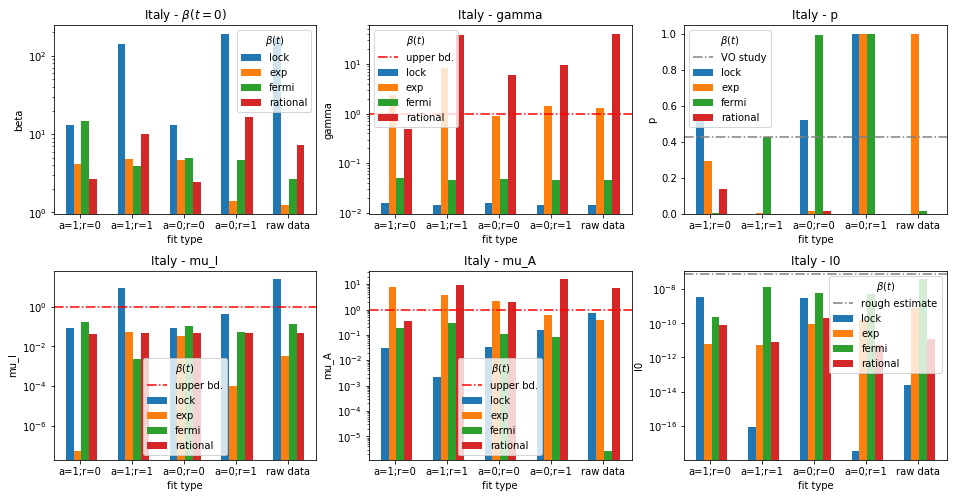

Exchanged label<->axis


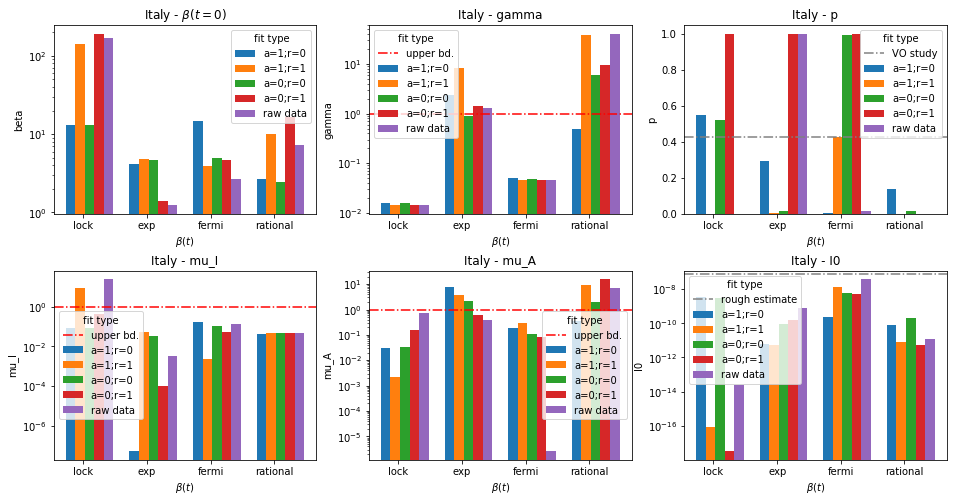

In [15]:
#SEIAR params, label: time, axis: fit type

#calculate r'$\beta(0)$'
fermis=df[df.time=='fermi']
df_params=df.copy()
print('beta_0 --> beta(t=0) for fermi')
for i in fermis.index:
    beta=fermis.loc[i].beta
    alpha = fermis.loc[i].alpha
    t0 = fermis.loc[i].t_lock
    realbeta_0 = beta * 2. / ( 1. + np.exp(alpha*(-t0)) )
    print(f'beta_0={beta} --> beta(t=0)={realbeta_0}')
    df_params.at[i,'beta']=realbeta_0
    
#estimate I0 from data
mod=models[country]['lock']
f0=np.array([0.]+list(mod.data[:L+z-1]))/mod.N
I0_est = f0.sum()/z
I0_est = f0.sum()/L
print('rough I0 estimation' ,I0_est)

#barplot
width=0.15
x=np.array(np.arange(5)-3*width)
fig = plt.figure(figsize=(16,8))
for j,p in enumerate(params[:6]):
    data=[]
    plt.subplot(2,3,j+1)
    for i,time in enumerate(times):
        data=df_params[df_params.time==time]
        data=data.dropna(axis=1)
        x=np.arange(len(data))
        plt.bar(x+ i*width,list(data[p]), width = width, label=time)
    
    if p in ('I0','mu_I', 'gamma', 'mu_A','beta'): #logscale
        plt.yscale('log')
    if p=='beta': plt.title(country + ' - '+ r'$\beta(t=0)$') #redefine param
    if p in ('gamma', 'mu_I', 'mu_A'):
        plt.axhline(y=1, color='r', linestyle='-.',label='upper bd.')
    if p =='p':
        plt.axhline(y=0.43, color='gray', linestyle='-.',label='VO study')
    if p =='I0':
        plt.axhline(y=I0_est, color='gray', linestyle='-.',label='rough estimate')
    
    plt.legend(title=r'$\beta(t)$')
    plt.xticks(x+0.2, labels=x_lab)
    plt.title(country + ' - '+p)
    if p=='beta': plt.title(country + ' - '+ r'$\beta(t=0)$') #redefine param
    plt.xlabel('fit type')
    plt.ylabel(p)
fig.subplots_adjust(hspace=.3)
if saveFIG:
    fname = country +'_'+ 'params_bars_weights' +'.png'
    plt.savefig('FIGURES/'+fname)
plt.show()


##########################
print('Exchanged label<->axis')
#SEIAR params, label:fit type, axis: time

ws=x_lab
data=[]
datas=[]
for i,time in enumerate(times):
    data=df_params[df_params.time==time]
    datas.append(data)

df_reshape=[]
for j in range(5):
    for i, time in enumerate(times):
        row=datas[i].iloc[j].to_list()
        df_reshape.append(row)
df_reshape=pd.DataFrame(df_reshape,columns=df_params.columns)

width=0.15
x=np.array(np.arange(5)-3*width)
fig = plt.figure(figsize=(16,8))
for j,p in enumerate(params[:6]):
    data=[]
    plt.subplot(2,3,j+1)
    for i,w in enumerate(ws):
        data=df_reshape.loc[i*4:i*4+3][p]
        x=np.arange(len(data))
        plt.bar(x+ i*width,list(data), width = width, label=w)
    
    if p in ('I0','mu_I', 'gamma', 'mu_A','beta'): #logscale
        plt.yscale('log')
    if p in ('gamma', 'mu_I', 'mu_A'):
        plt.axhline(y=1, color='r', linestyle='-.',label='upper bd.')
    if p =='p':
        plt.axhline(y=0.43, color='gray', linestyle='-.',label='VO study')
    if p =='I0':
        plt.axhline(y=I0_est, color='gray', linestyle='-.',label='rough estimate')
    
    plt.legend(title='fit type')
    plt.xticks(x+0.2, labels=times)
    plt.title(country + ' - '+p)
    if p=='beta': plt.title(country + ' - '+ r'$\beta(t=0)$') #redefine param
    plt.xlabel(r'$\beta(t)$')
    plt.ylabel(p)
fig.subplots_adjust(hspace=.3)
if saveFIG:
    fname = country +'_'+ 'params_bars_time' +'.png'
    plt.savefig('FIGURES/'+fname)
plt.show()

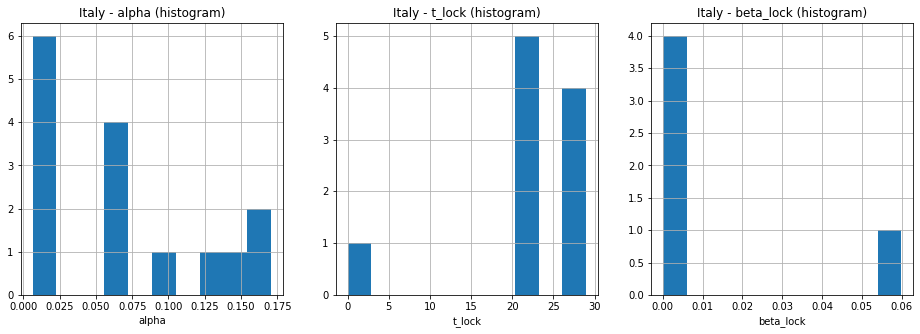

In [16]:
fig = plt.figure(figsize=(16,5))
for i, p in enumerate(params[-3:]):
    plt.subplot(1,3,i+1)
    df[p].hist()
    plt.title(country + ' - '+p +' (histogram)')
    plt.xlabel(p)
if saveFIG:
    fname = country +'_'+ 'params_hist' +'.png'
    plt.savefig('FIGURES/'+fname)
plt.show()